In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

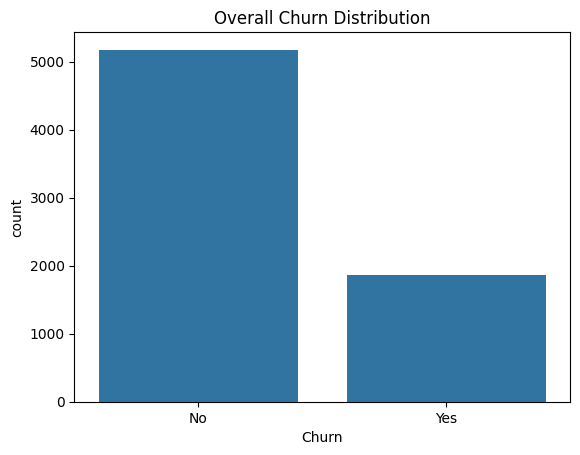

In [7]:
sns.countplot(x="Churn", data=df)
plt.title("Overall Churn Distribution")
plt.show()

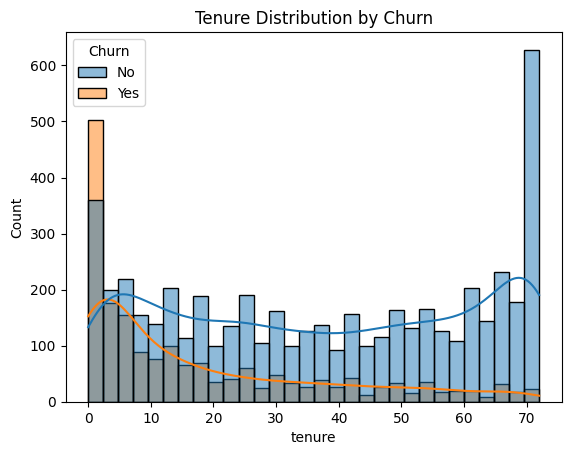

In [8]:
sns.histplot(
    data=df,
    x="tenure",
    hue="Churn",
    bins=30,
    kde=True
)
plt.title("Tenure Distribution by Churn")
plt.show()

In [9]:
df.groupby("Churn")["tenure"].median()

Churn
No     38.0
Yes    10.0
Name: tenure, dtype: float64

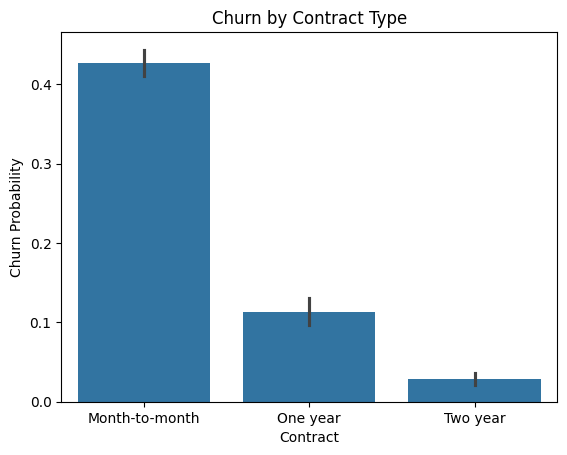

In [10]:
sns.barplot(
    x="Contract",
    y=(df["Churn"] == "Yes"),
    data=df
)
plt.ylabel("Churn Probability")
plt.title("Churn by Contract Type")
plt.show()

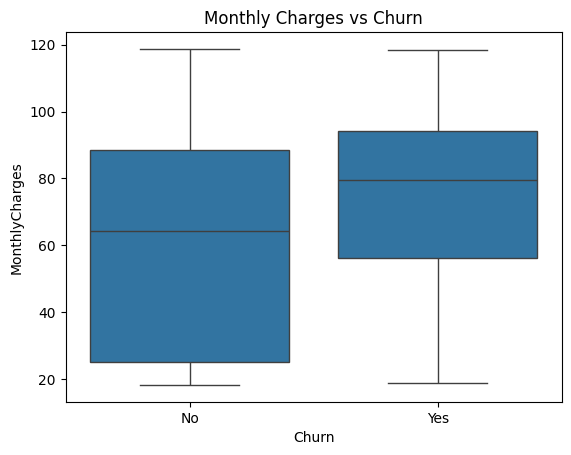

In [11]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

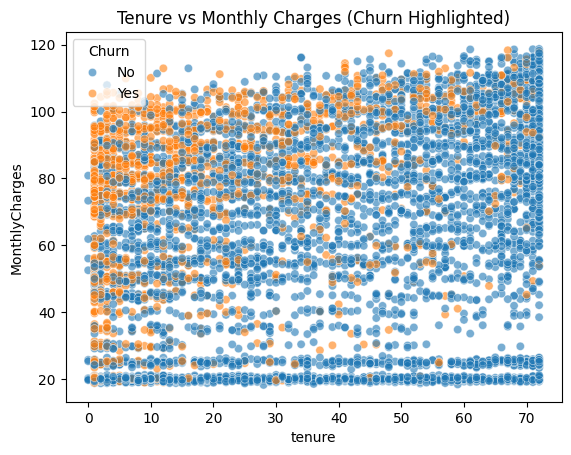

In [12]:
sns.scatterplot(
    x="tenure",
    y="MonthlyCharges",
    hue="Churn",
    data=df,
    alpha=0.6
)
plt.title("Tenure vs Monthly Charges (Churn Highlighted)")
plt.show()

In [13]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

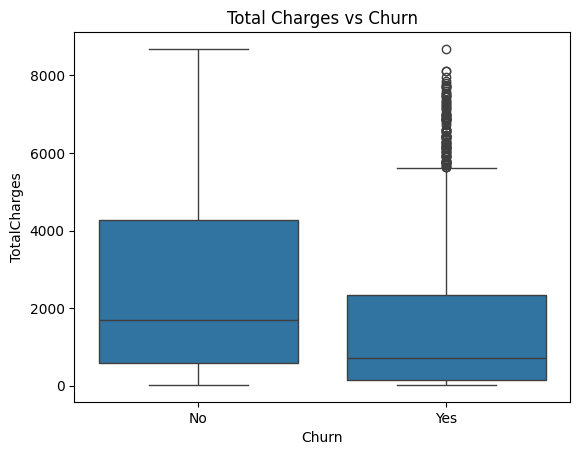

In [14]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

In [15]:
service_cols = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df["service_count"] = (df[service_cols] == "Yes").sum(axis=1)

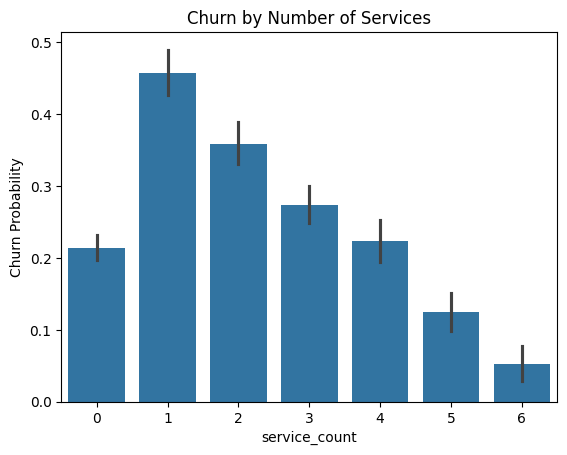

In [17]:
sns.barplot(
    x="service_count",
    y=(df["Churn"] == "Yes"),
    data=df
)
plt.ylabel("Churn Probability")
plt.title("Churn by Number of Services")
plt.show()

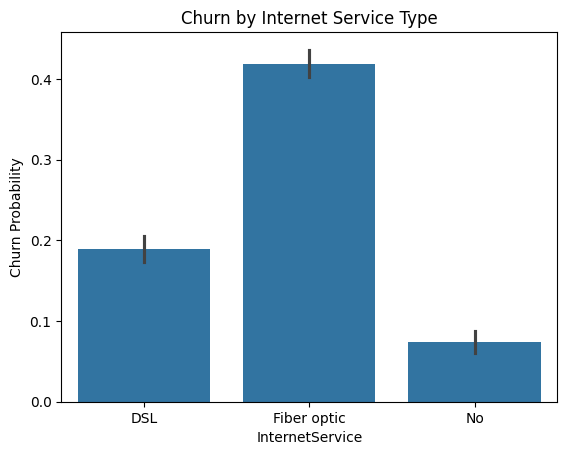

In [18]:
sns.barplot(
    x="InternetService",
    y=(df["Churn"] == "Yes"),
    data=df
)
plt.ylabel("Churn Probability")
plt.title("Churn by Internet Service Type")
plt.show()

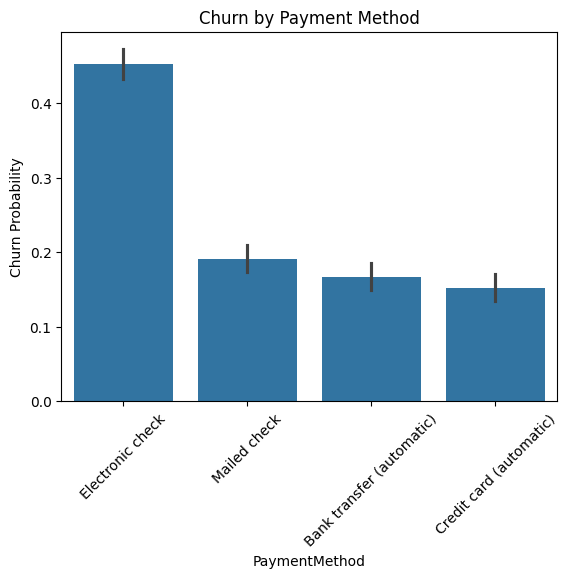

In [19]:
sns.barplot(
    x="PaymentMethod",
    y=(df["Churn"] == "Yes"),
    data=df
)
plt.xticks(rotation=45)
plt.ylabel("Churn Probability")
plt.title("Churn by Payment Method")
plt.show()